# Revenue and Pricing Analysis

**Work Package 2.4: Pricing Effectiveness**

This notebook analyzes pricing effectiveness, discount strategies, and price code performance.

## Overview
- Discount Analysis: Full price vs discounted tickets
- Subscriber Discount ROI: Are discounts paying off?
- Price Code Effectiveness: Which codes generate revenue?
- Revenue by Section/Price Tier: Premium vs Mid-tier vs Value


In [33]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


Loading master_tickets.csv...
✓ Loaded 73,534 ticket records
✓ Columns: 33
✓ Date range: 2022-03-02 00:00:00 to 2024-06-16 00:00:00

Paid tickets (excluding comps): 73,534 records

Sample data:


,fiscal_year,acct_id,is_college_pass,event_name,event_date,add_datetime,days_before_event,section_name,row_name,seat_num,last_seat,num_seats,price_code,price_code_type,price_section,purchase_price,paid_amount,comp,comp_name,source,ticket_type,age,gender,marital_status,education,zip,Weekend,Series,Name,Type,month,month_name,season_period
0,FY23,8362049,False,230922SE,2022-09-22,2022-07-15,69.00,BALCL,A,4,5,2,ICO,CYO Subscription,Front Balcony,34.00,68.00,N,Not Comp,online,Subscription,58.00,Male,Single,NaN,30041,CS1,1,Opening Weekend,Classical,7.00,July,Off-Season
1,FY23,8449640,False,230922SE,2022-09-22,2022-09-14,8.00,BALCL,B,1,2,2,IS1,Fixed Sophomore Subscription 6 Concert,Front Balcony,23.00,46.00,N,Not Comp,ASO Staff,Subscription,80.00,Male,Married,Graduate School,30316,CS1,1,Opening Weekend,Classical,9.00,September,Opening
2,FY23,4061365,False,230922SE,2022-09-22,2022-07-27,57.00,BALCL,B,4,5,2,ICO,CYO Subscription,Front Balcony,34.00,68.00,N,Not Comp,online,Subscription,58.00,Female,Single,College,30308,CS1,1,Opening Weekend,Classical,7.00,July,Off-Season
3,FY23,354115,False,230922SE,2022-09-22,2022-04-05,170.00,BALCL,C,1,2,2,IE4,Fixed Established Subscription 24 Concert,Front Balcony,30.00,60.00,N,Not Comp,ASO Staff,Subscription,72.00,Male,Married,College,30087,CS1,1,Opening Weekend,Classical,4.00,April,Peak
4,FY23,8908470,False,230922SE,2022-09-22,2022-09-20,2.00,BALCL,C,3,4,2,I*,Single Ticket,Front Balcony,30.00,60.00,N,Not Comp,online,Single Ticket,24.00,Male,Inferred Single,High School,30253,CS1,1,Opening Weekend,Classical,9.00,September,Opening


## 2.4.A: Discount Analysis

For each event and section/price_tier combination, identify full-price tickets and calculate discount percentages.

**Methodology:** Full price is established using Single Ticket buyers as the baseline (90th percentile of their prices per event-section). This approach:
- **Avoids circular logic**: Uses known full-price payers (Single Ticket buyers) rather than statistical outlier detection on discounted data
- **Accounts for section differences**: Calculates full price separately for each event-section combination (e.g., "Event X - Premium Orchestra", "Event X - Front Balcony")
- **Uses fixed-dollar thresholds**: Compares tickets using $5 and $10 thresholds (more consistent than percentage-based thresholds across price ranges)

Classifications are then applied to all buyers (Subscribers, College Pass, etc.) to measure discount effectiveness.


2.4.A: DISCOUNT ANALYSIS

METHODOLOGY: Using Single Ticket buyers as baseline for full price
  - Single Ticket buyers typically pay full price (no volume discounts)
  - Subscribers explicitly receive discounts (documented in project)
  - This avoids circular logic of using statistics on discounted data

Buyer category distribution:
buyer_category
Single Ticket    34340
Subscriber       33199
College Pass      5995
Name: count, dtype: int64

Step 1: Establishing full price baseline from Single Ticket buyers...
Grouping by: event_name + price_section (or section_name if price_section unavailable)

Single Ticket buyers: 34,340 tickets

Calculating full price for each event-section combination...
✓ Calculated full prices for 1,188 event-section combinations
✓ Full price range: $22.80 - $726.00

✓ Merged full prices to all 73,534 tickets
✓ Tickets with full price data: 67,445 (91.7%)

Step 2: Classifying tickets as full price vs discounted...
Using multiple threshold methods:
  1. Within $5

2.4.B: SUBSCRIBER DISCOUNT ROI

Buyer category distribution:
buyer_category
Single Ticket    34340
Subscriber       33199
College Pass      5995
Name: count, dtype: int64

Average ticket price by buyer category:
  buyer_category  avg_price  median_price  ticket_count  total_revenue
0   College Pass       1.10          0.00          5995        6602.00
1  Single Ticket     121.92        102.00         34340     4186726.03
2     Subscriber      90.76         76.00         33199     3012984.02

IMPROVED: Comparing Single Ticket vs Subscriber WITHIN each section:
(This ensures we compare Orchestra vs Orchestra, not Orchestra vs Balcony)

  Weighted average Single Ticket price (by section): $121.92
  Weighted average Subscriber price (by section): $90.76
  Average discount per ticket: $31.16
  Average discount percentage: 25.6%

Sample: Top 10 sections by Single Ticket price:
    price_section  Single Ticket  Subscriber  discount_amount  discount_pct
         On Stage         219.24        

2.4.C: PRICE CODE EFFECTIVENESS

Total unique price codes: 365

Top 20 price codes by revenue:
price_code  total_revenue  avg_price  ticket_count  unique_patrons  pct_of_tickets  pct_of_revenue
        C*      648923.50     118.92          5457            4551            7.42            9.00
        A*      603261.10     191.09          3157            2586            4.29            8.37
        E*      423470.95     102.54          4130            3550            5.62            5.88
        F*      337676.30     193.29          1747            1454            2.38            4.69
       AE1      256464.00     173.17          1481             177            2.01            3.56
        G*      248289.35     150.21          1653            1517            2.25            3.45
        B*      246193.70     149.21          1650            1435            2.24            3.42
        H*      239343.75     105.39          2271            2034            3.09            3.32
        D*    

2.4.D: REVENUE BY SECTION/PRICE TIER

Revenue by Section:
section_name  total_revenue  avg_price  ticket_count  total_seats  unique_patrons  revenue_per_seat
       ORCHL     2617502.93     112.53         23261        42669            8171             61.34
       ORCHR     1980203.67      88.77         22306        41411           10036             47.82
       LOGEL      742184.10     137.98          5379         9771            2006             75.96
       LOGER      740851.75     154.60          4792         9057            2523             81.80
       BALCL      373637.95      52.83          7072        12897            3916             28.97
       BALCR      334249.15      53.87          6205        11430            3959             29.24
      DRESSL      205498.40      82.73          2484         4512            1444             45.54
      DRESSR      192026.10     100.96          1902         4015            1307             47.83
         GA1        9896.00     215.13    

CREATING VISUALIZATIONS FOR CLIENT PRESENTATION

Section 1: Discount Analysis Visualizations
--------------------------------------------------------------------------------
✓ Saved: WP2_4A_Discount_Breakdown.png


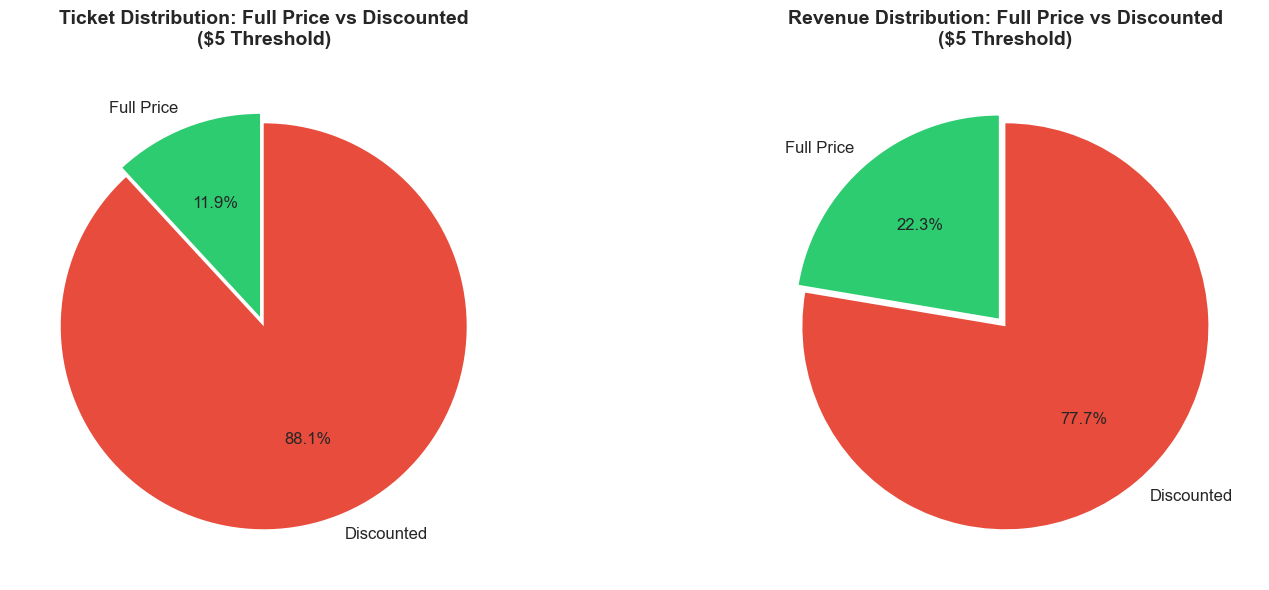

✓ Saved: WP2_4A_Threshold_Comparison.png


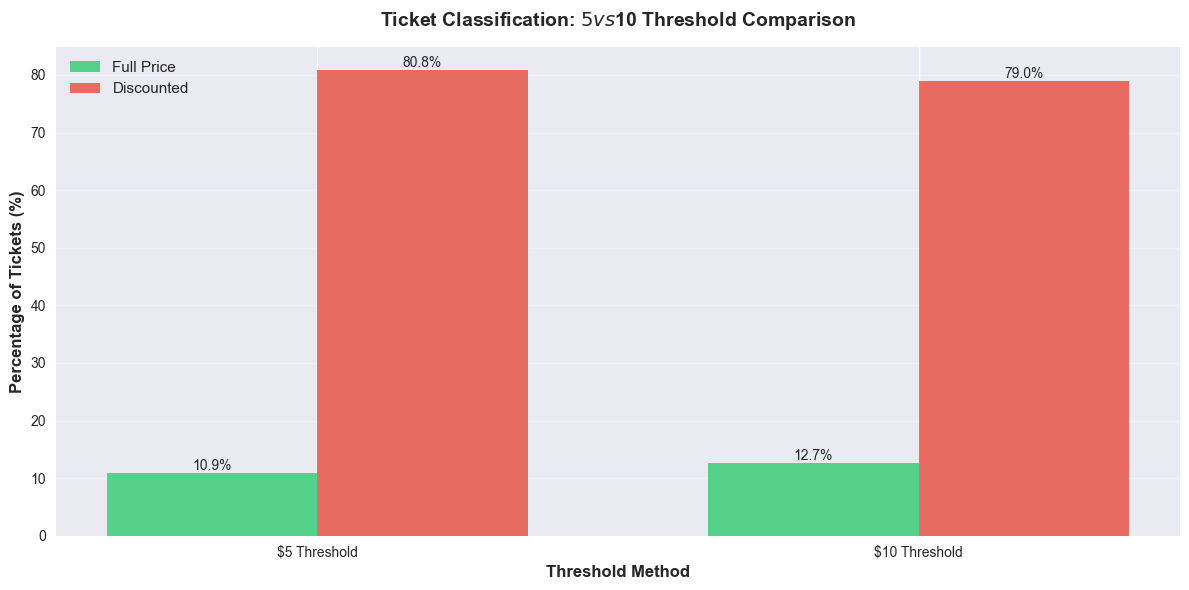

✓ Saved: WP2_4A_Like_for_Like_Comparison.png


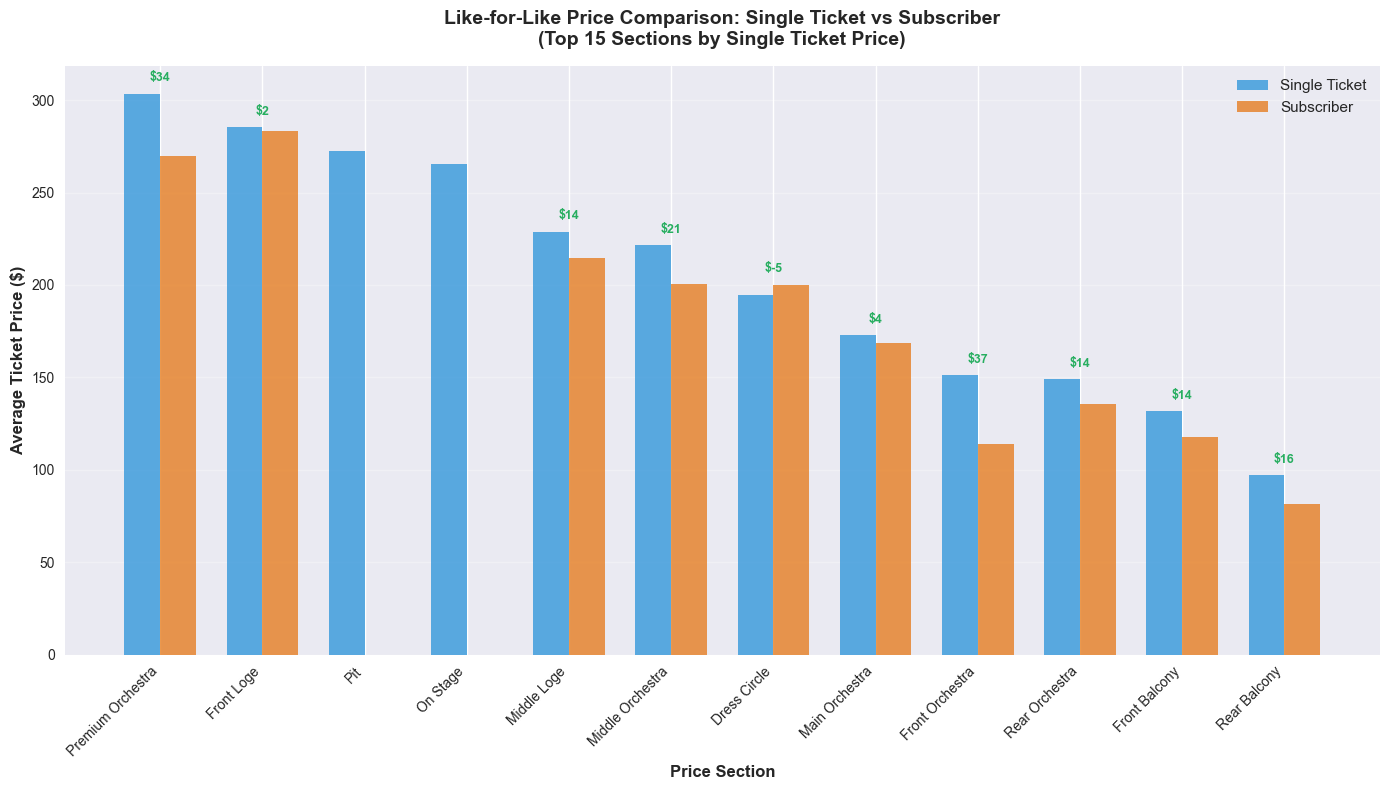


Section 2: Subscriber Discount ROI Visualizations
--------------------------------------------------------------------------------
✓ Saved: WP2_4B_ROI_Comparison.png


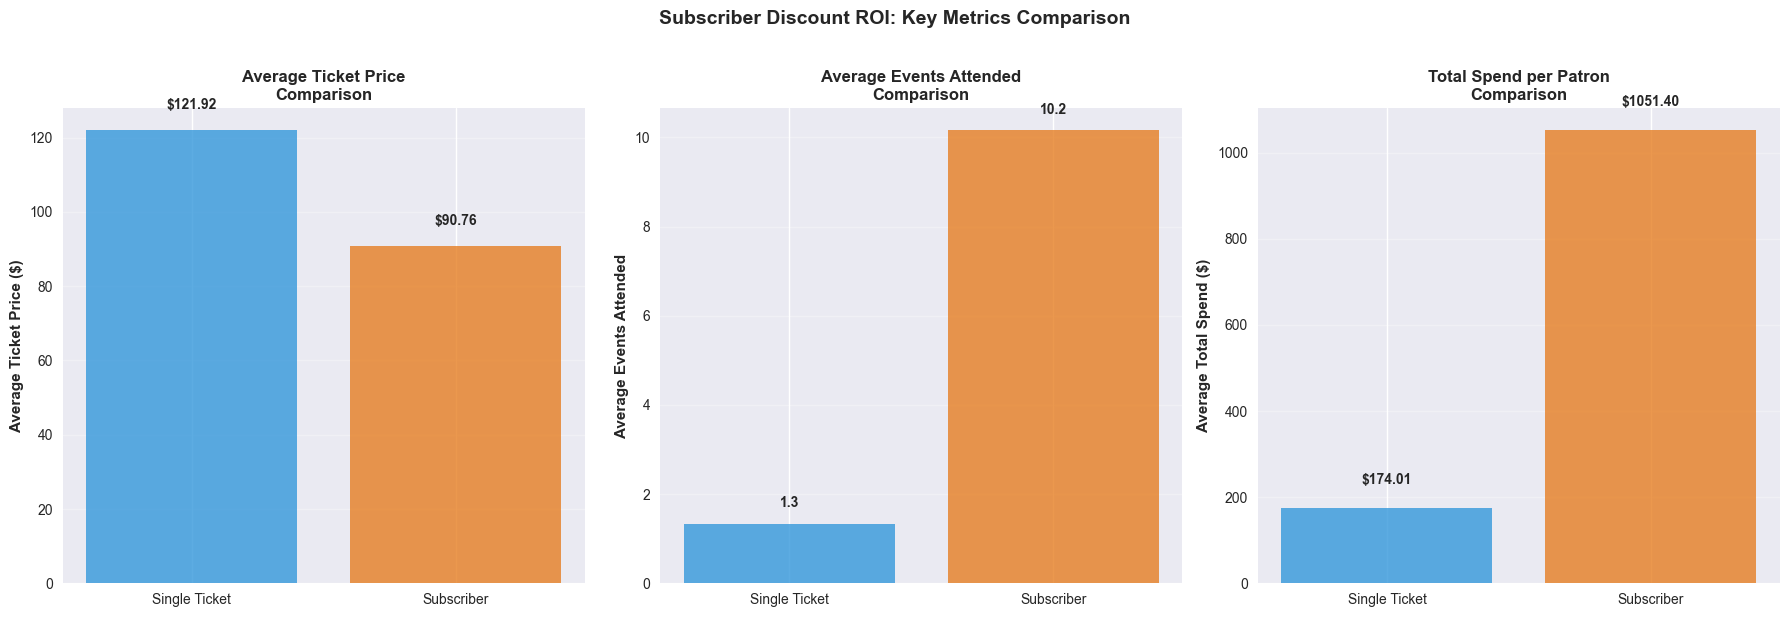

✓ Saved: WP2_4B_Revenue_Multiplier.png


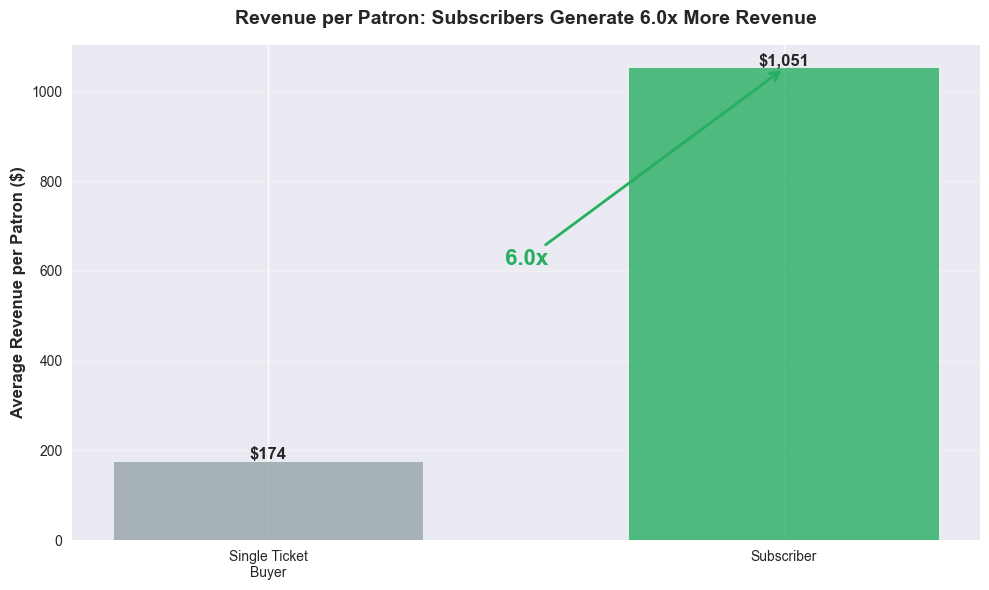


Section 3: Price Code Effectiveness Visualizations
--------------------------------------------------------------------------------
✓ Saved: WP2_4C_Top_20_Price_Codes.png


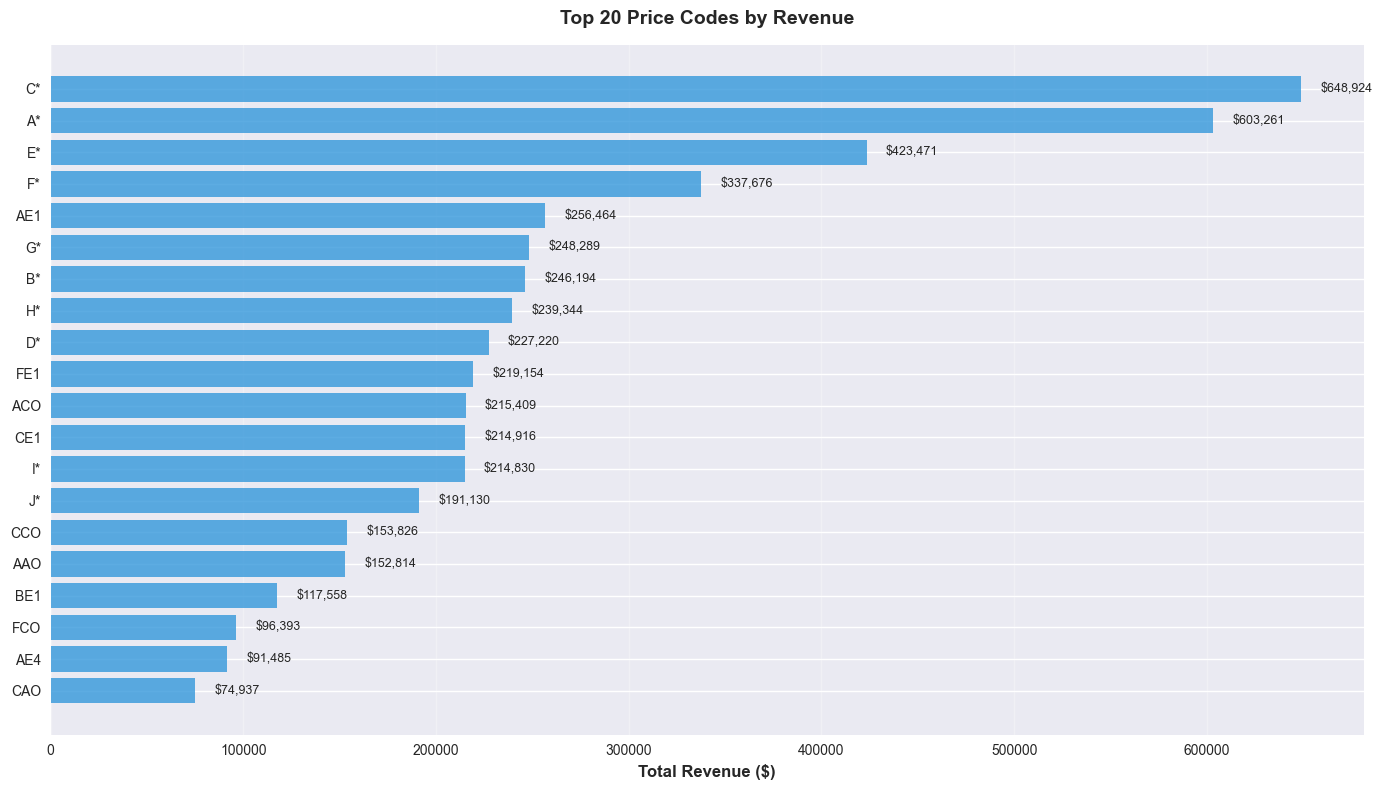

✓ Saved: WP2_4C_Revenue_Concentration.png


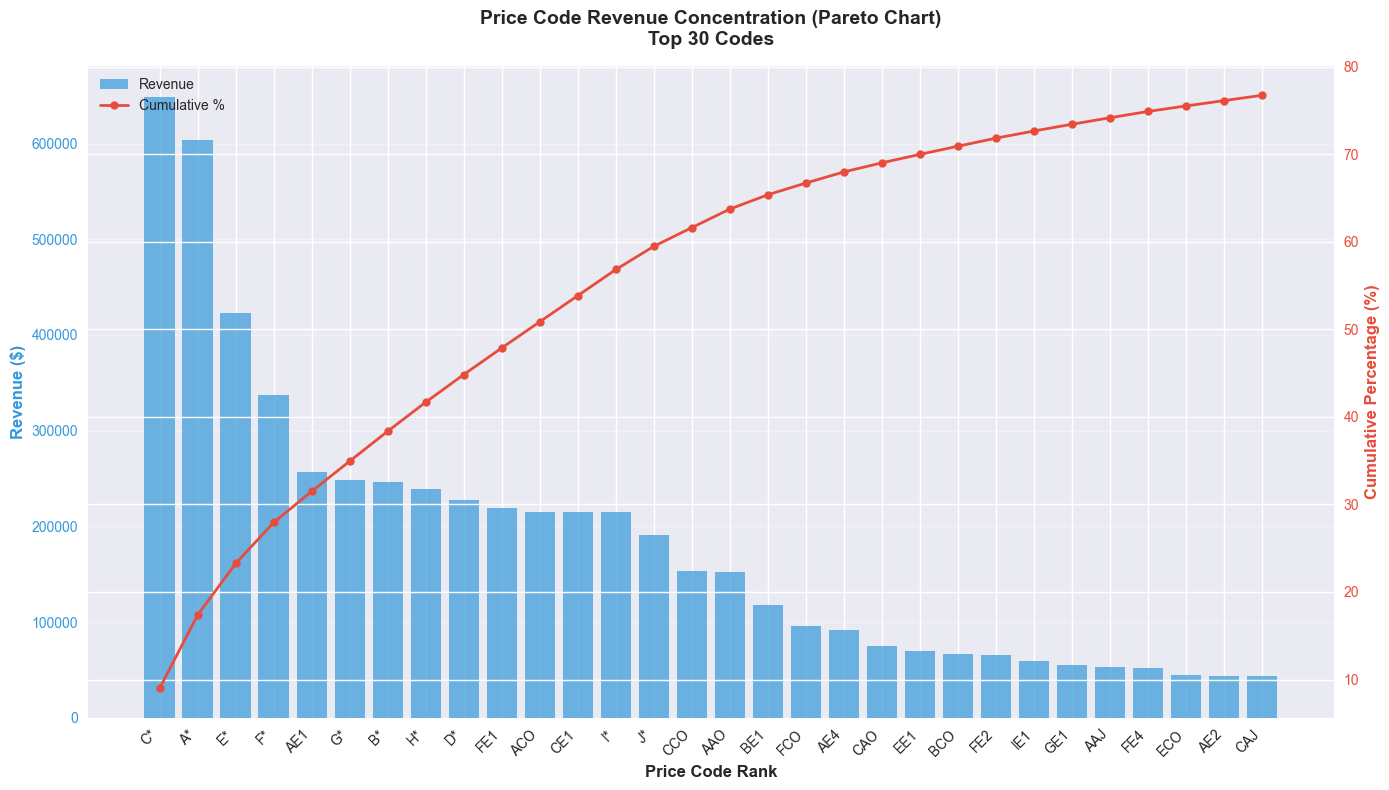

✓ Saved: WP2_4C_Price_Code_Types.png


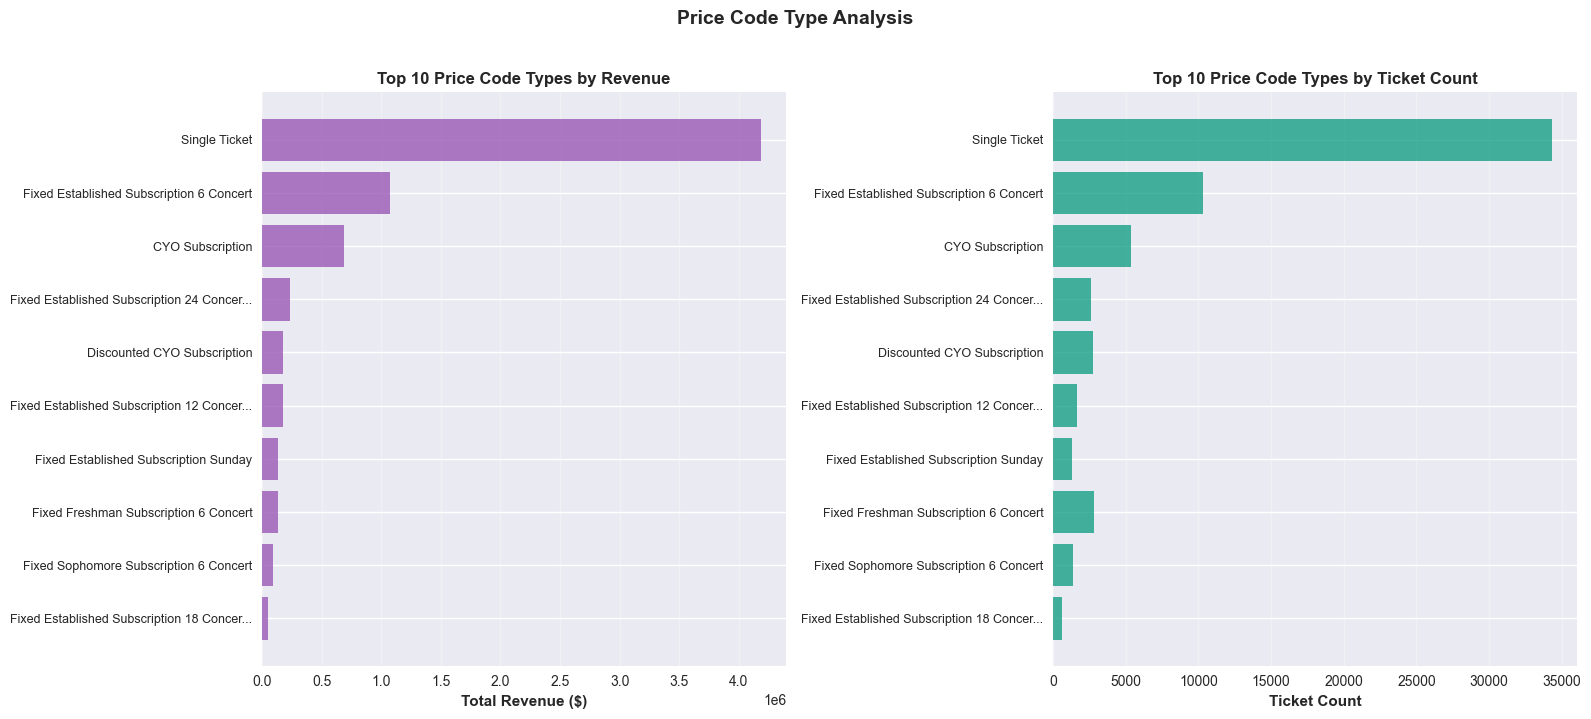


Section 4: Revenue by Section/Price Tier Visualizations
--------------------------------------------------------------------------------
✓ Saved: WP2_4D_Revenue_by_Section.png


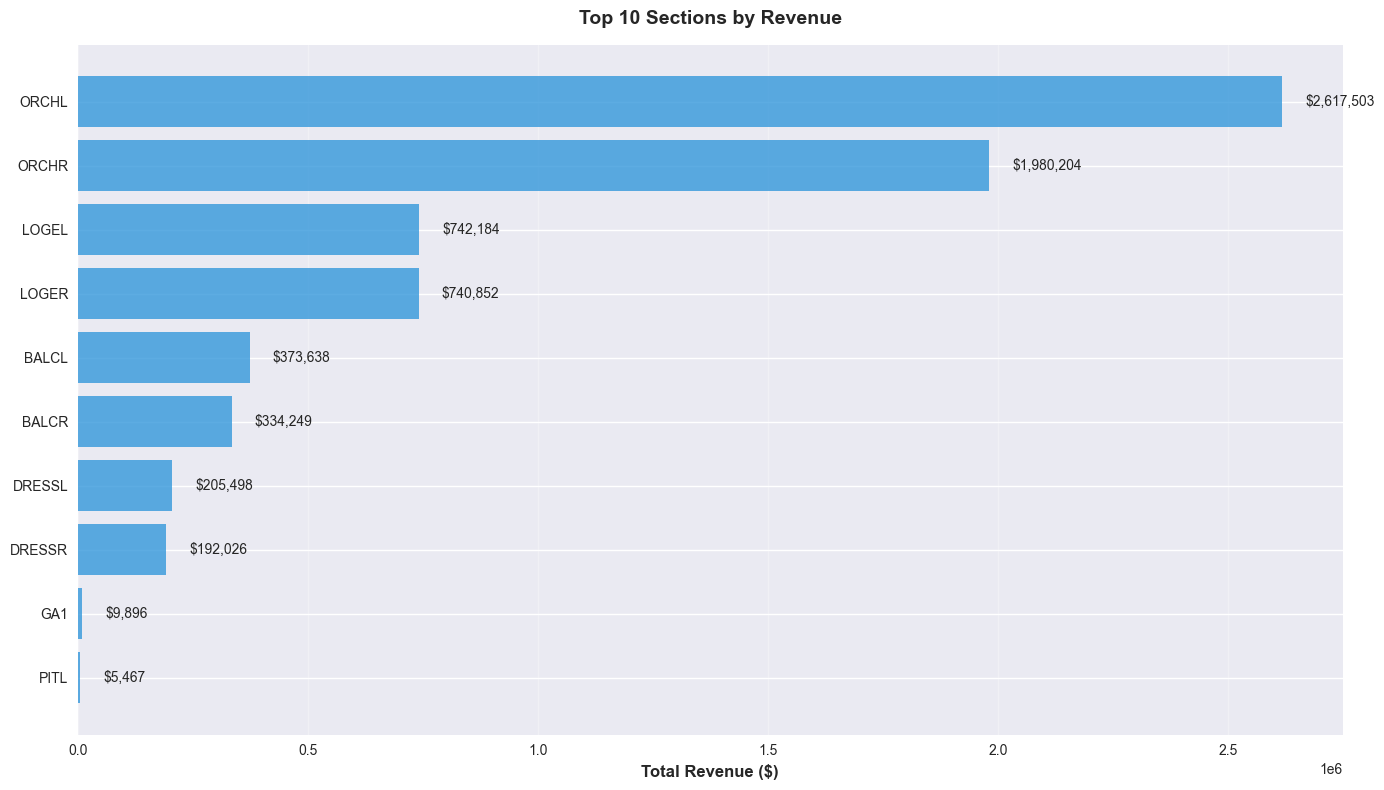

✓ Saved: WP2_4D_Revenue_per_Seat.png


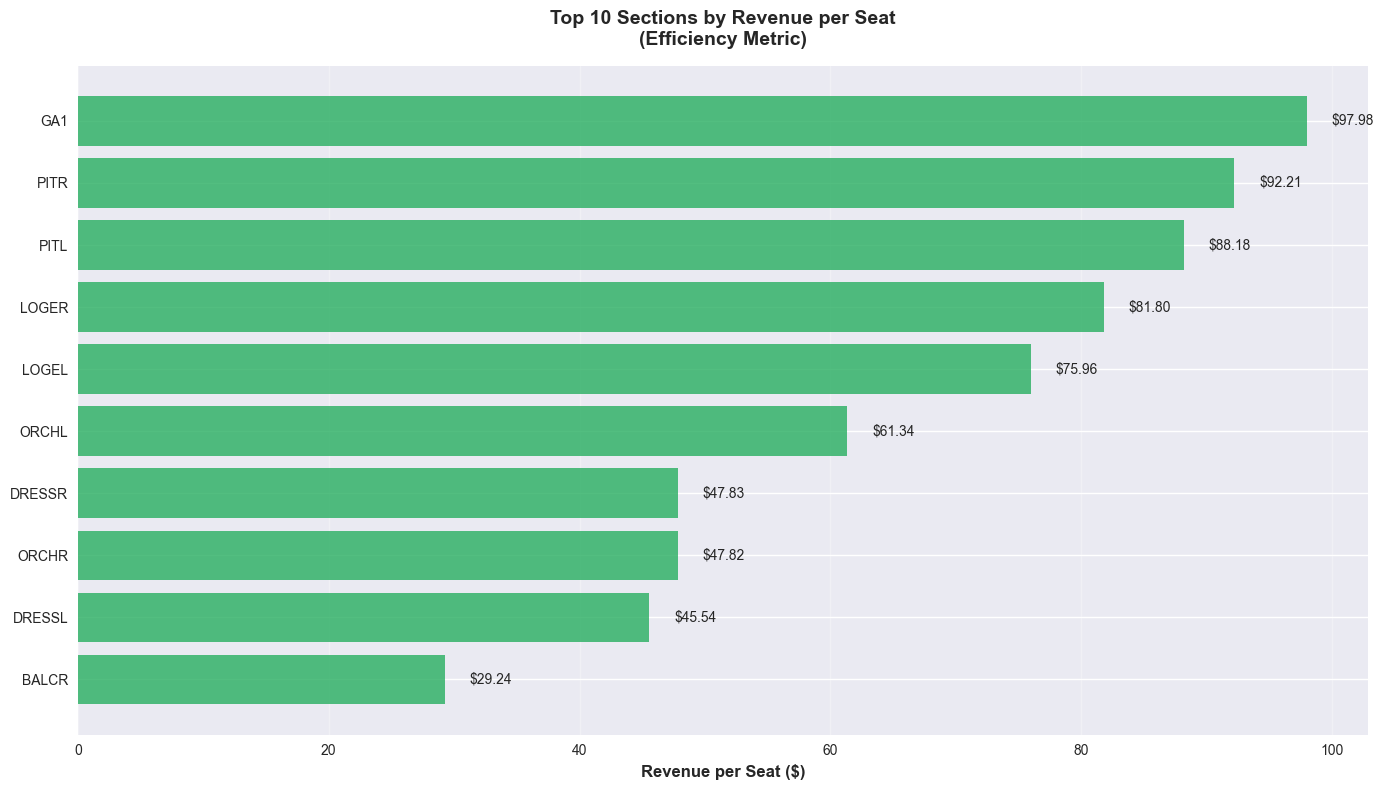

✓ Saved: WP2_4D_Price_Tier_Analysis.png


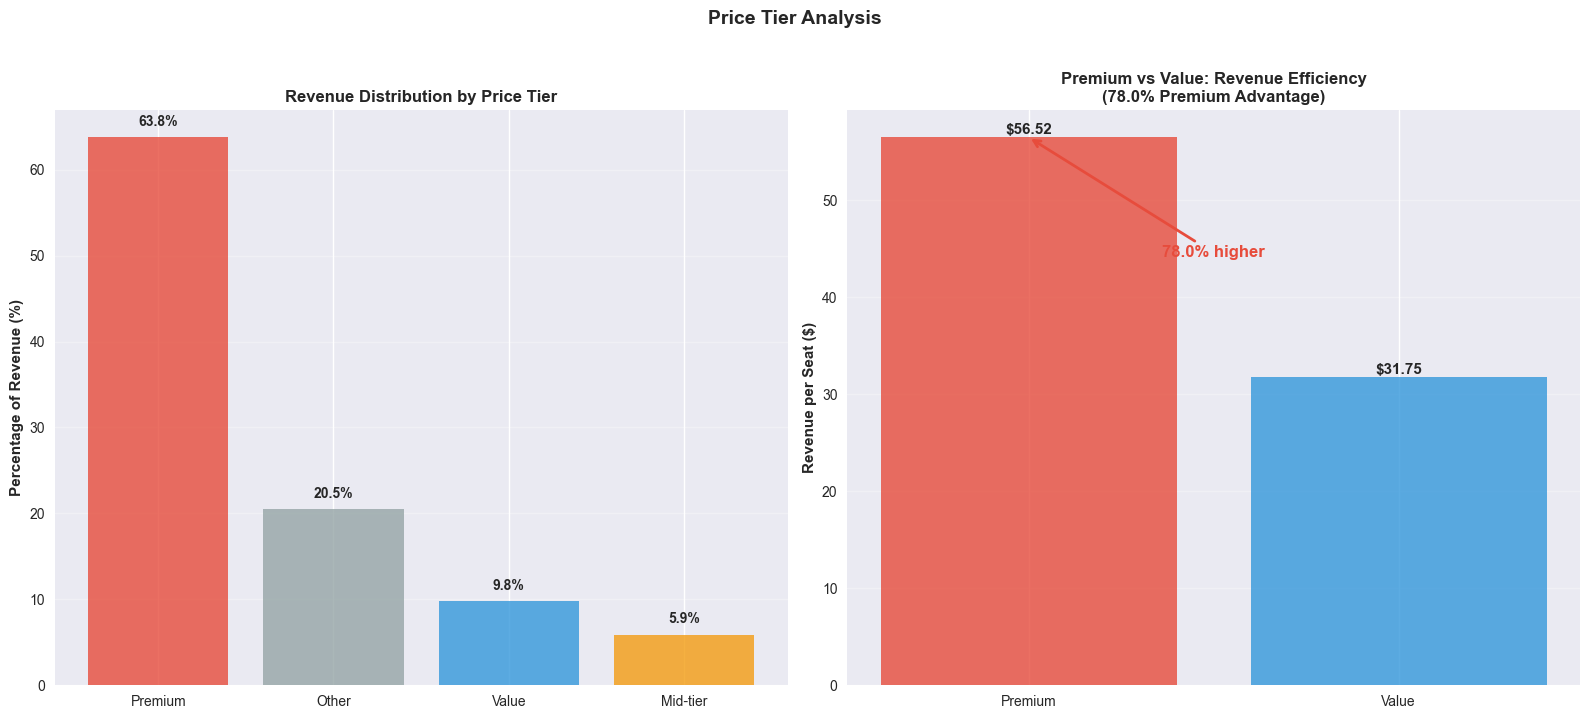


ALL VISUALIZATIONS COMPLETE!

All charts saved as PNG files (300 DPI) for client presentation.
Files saved:
  - WP2_4A_Discount_Breakdown.png
  - WP2_4A_Threshold_Comparison.png
  - WP2_4A_Like_for_Like_Comparison.png
  - WP2_4B_ROI_Comparison.png
  - WP2_4B_Revenue_Multiplier.png
  - WP2_4C_Top_20_Price_Codes.png
  - WP2_4C_Revenue_Concentration.png
  - WP2_4C_Price_Code_Types.png
  - WP2_4D_Revenue_by_Section.png
  - WP2_4D_Revenue_per_Seat.png
  - WP2_4D_Price_Tier_Analysis.png


PRICING EFFECTIVENESS - KEY FINDINGS

1. DISCOUNT ANALYSIS:
   - 8.3% of tickets sold at full price
   - 83.5% of tickets sold at discount
   - Full-price revenue: 18.3% of total
   - Discounted revenue: 81.6% of total
   - Average discount: 50.5%

2. SUBSCRIBER DISCOUNT ROI:
   - Subscribers pay $31.16 less per ticket
   - But attend 10.2 events vs 1.3 for single buyers
   - Result: Subscribers spend $1051.40 vs $174.01 per patron
   - Subscribers generate 6.0x more revenue per patron
   - ✓ CONCLUSION: Subscriber discounts are paying off!

3. PRICE CODE EFFECTIVENESS:
   - Total unique price codes: 365
   - Codes with <1% of tickets: 342 (93.7%)
   - Codes generating <$5,000: 243 (66.6%)
   - Top 20 codes represent: 69.0% of revenue
   - Recommendation: Consider consolidating low-usage codes

4. REVENUE BY SECTION/TIER:
   - Top revenue section: ORCHL ($2,617,502.93)
   - Highest revenue per seat: ORCHL ($61.34)
   - Premium tier: 63.8% of revenue
   - Value tier: 9.8% of revenue
   

Exporting analysis results...

✓ Exported: WP2_4A_Discount_Analysis.csv
✓ Exported: WP2_4B_Buyer_Category_Analysis.csv
✓ Exported: WP2_4B_Patron_Stats_by_Category.csv
✓ Exported: WP2_4C_Price_Code_Analysis.csv
✓ Exported: WP2_4C_Price_Type_Analysis.csv
✓ Exported: WP2_4D_Section_Analysis.csv
✓ Exported: WP2_4D_Tier_Analysis.csv

All analysis results exported successfully!
